# Q1 Feedforward

## 1.1&1.2
Written Questions: See https://github.com/rivenseiun/ANLY-590-Homework/blob/master/HW2-Written%20Questions%20-%2020191104-013432.pdf

## 1.3 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


#Because the network is used for binary classification
#we choose sigmoid function as the output function
def sigmoid(x):
    return  1 / (1 + np.exp(-x))

def ff_nn_Relu(x,w,b,v,c):    
    a = np.dot(x,w)+b
    #Relu
    h=np.maximum(a,0)
    
    yhat = sigmoid(np.dot(h,v)+c)
    return yhat

## 1.4

In [2]:
x = np.array([[1,-1],[0,-1],[0,1]])
w = np.array([[1,-1,0],[0,0,0.5]])
b = np.array([[0,0,1]])
v = np.array([[1,0,-1]]).T
c = np.array([[1]])
yhat = ff_nn_Relu(x,w,b,v,c)
print(yhat)


[[0.81757448]
 [0.62245933]
 [0.37754067]]


# Q2 Gradient Descent

## 2.1
Written Questions: See https://github.com/rivenseiun/ANLY-590-Homework/blob/master/HW2-Written%20Questions%20-%2020191104-013432.pdf

## 2.2

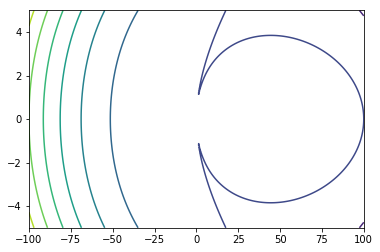

In [3]:
x = np.linspace(-100, 100, 500)
y = np.linspace(-5, 5, 500)
X, Y = np.meshgrid(x, y)

Z = (1-X**3)+100*(Y**2-X)**2
fig, ax = plt.subplots()
contour_ = ax.contour(X, Y, Z)

## 2.3

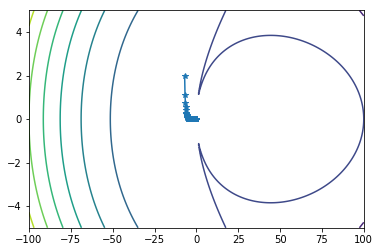

In [4]:
def grad_f(betas):
    x, y = betas
    dLdbeta0 = -3*x**2+200*x-200*y**2
    dLdbeta1 = 400*y**3 - 400*x*y
    return np.array([dLdbeta0, dLdbeta1])

def grad_descent(starting_point, iters, lr):
    betas = starting_point
    trajectory = [betas]
    for i in range(iters):
        grad = grad_f(betas)
        betas = betas - grad*lr
        trajectory.append(betas)
    return np.array(trajectory)


traj = grad_descent(np.array([-7, 2]),1000,0.0001)
fig, ax = plt.subplots()
contour_ = ax.contour(X, Y, Z)
ax.plot(traj[:, 0], traj[:, 1],'-*')

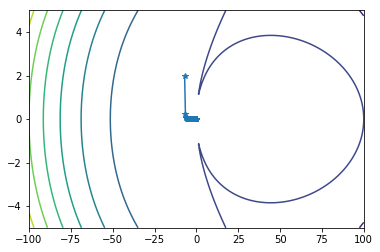

In [5]:
traj = grad_descent(np.array([-7, 2]),1000,0.0002)
fig, ax = plt.subplots()
contour_ = ax.contour(X, Y, Z)
ax.plot(traj[:, 0], traj[:, 1],'-*')

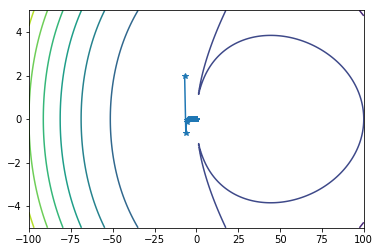

In [6]:
traj = grad_descent(np.array([-7, 2]),1000,0.0003)
fig, ax = plt.subplots()
contour_ = ax.contour(X, Y, Z)
ax.plot(traj[:, 0], traj[:, 1],'-*')

## 2.4

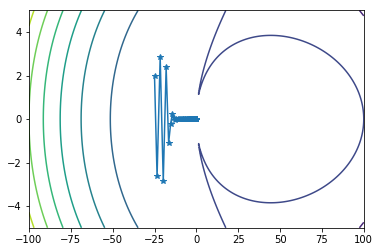

In [7]:
def grad_descent_momentum(alpha,starting_point, iters, lr):
    betas = starting_point
    v = np.array([0,0])
    trajectory = [betas]
    for i in range(iters):
        grad = grad_f(betas)
        v= alpha*v-lr*grad
        betas = betas +v
        trajectory.append(betas)
    return np.array(trajectory)




traj = grad_descent_momentum(0.2,np.array([-25, 2]),1000,0.0002)
fig, ax = plt.subplots()
contour_ = ax.contour(X, Y, Z)
ax.plot(traj[:, 0], traj[:, 1],'-*')

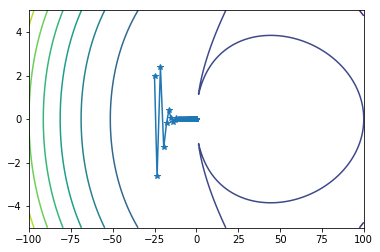

In [8]:
traj = grad_descent_momentum(0.3,np.array([-25, 2]),1000,0.0002)
fig, ax = plt.subplots()
contour_ = ax.contour(X, Y, Z)
ax.plot(traj[:, 0], traj[:, 1],'-*')

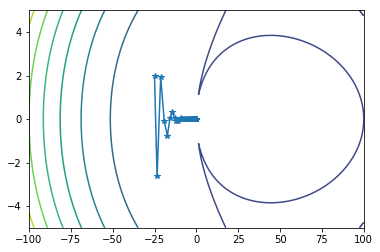

In [9]:
traj = grad_descent_momentum(0.4,np.array([-25, 2]),1000,0.0002)
fig, ax = plt.subplots()
contour_ = ax.contour(X, Y, Z)
ax.plot(traj[:, 0], traj[:, 1],'-*')

# Q3  Backprop

## 3.1
Written Questions: See https://github.com/rivenseiun/ANLY-590-Homework/blob/master/HW2-Written%20Questions%20-%2020191104-013432.pdf

## 3.2

In [10]:
# This network is used for binary classification 
#so we use binary cross entropy as the loss function
def loss(y,yhat):
    loss = -y*np.log(yhat)-(1-y)*np.log(1 - yhat)

    return loss


def grad_f1(x,w,b,v,c,y):
    yhat = ff_nn_Relu(x,w,b,v,c)
    a = np.dot(x,w)+b
    h = np.maximum(a,0)
    loss_ = loss(y,yhat)
    
    dL =-(y/yhat - (1-y)/(1-yhat))
    dc = dL*sigmoid(np.dot(h,v)+c)*(1-sigmoid(np.dot(h,v)+c))
    d_a = np.where(a>0,1,0)
    d_h = np.dot(x.T,d_a)
    db = d_a*np.dot(dc,v.T)
    dw =np.dot(x.T, db)
    dv = np.dot(h.T,dc)    
    return loss_, np.mean(dc,axis = 0), dv, np.mean(db,axis = 0),dw


## 3.3

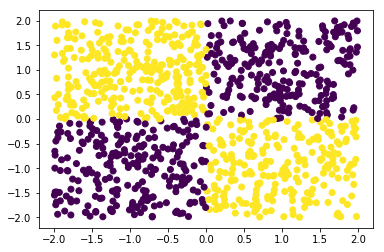

In [11]:
x = np.random.uniform(-2,2,size = (1000,2))
y = np.logical_xor(x[:,0]>0, x[:,1]>0)
plt.scatter(x[:,0], x[:,1],c=y)

## 3.4

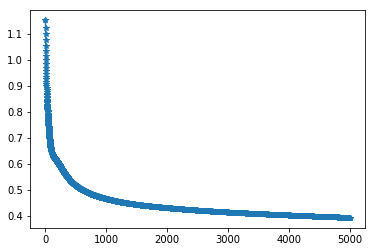

In [52]:
def grad_descent_(x,w,b,v,c,y,iters, lr):
    yhat = ff_nn_Relu(x,w,b,v,c) 
    betas = [w,b,v,c]
    
    trajectory = [betas]
    losses = [np.mean(loss(y,yhat))]
    
    for i in range(iters):
        loss_, dc, dv, db, dw = grad_f1(x,w,b,v,c,y)
        grad = [dw,db,dv,dc]
        betas = betas - lr * np.asarray(grad)
        w,b,v,c = betas
        losses.append(np.mean(loss_))

       
        
    return losses

w = np.random.rand(2,3)
b = np.random.rand(1,3)
v = np.random.rand(3,1)
c = np.random.rand(1,1)
y = np.where(y,1,0).reshape(1000,1)

losses_ = grad_descent_(x,w,b,v,c,y,5000,0.0001)
plt.plot(losses_, '-*')


## 3.5

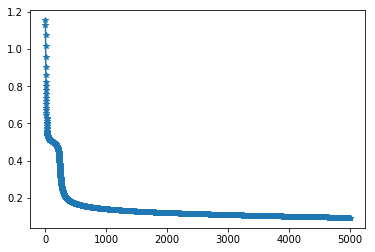

In [53]:
def grad_descent_m(alpha,x,w,b,v,c,y,iters, lr):
    yhat = ff_nn_Relu(x,w,b,v,c) 
    betas = [w,b,v,c]
    trajectory = [betas]
    losses = []
    
    v_w =np.zeros(np.shape(w))
    v_b =np.zeros(np.shape(b))
    v_v =np.zeros(np.shape(v))
    v_c =np.zeros(np.shape(c))
    v_ = [v_w,v_b,v_v,v_c]
    
    for i in range(iters):
        loss_, dc, dv, db, dw = grad_f1(x,w,b,v,c,y)
        grad = [dw,db,dv,dc]
        v_ = alpha*np.asarray(v_) +lr*np.asarray(grad)
        betas = betas - v_
        w,b,v,c = betas
        losses.append(np.mean(loss_))     
    return losses,betas

losses_m,betas = grad_descent_m(0.9,x,w,b,v,c,y,5000,0.0001)
plt.plot(losses_m, '-*')

Comparing with the gradient descent without momentum, we can see that the momentum method makes loss go lower than 0.2 in less than 1000 iterations, which is much faster than the method without momentum(this method uses over 5000 iters).

## 3.6

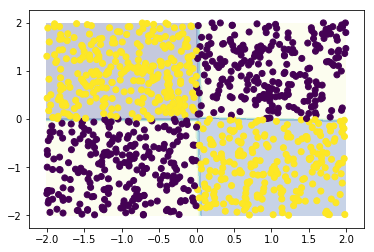

In [55]:
w,b,v,c = betas
h = 0.01
xx, yy = np.meshgrid(np.arange(-2, 2, h), np.arange(-2, 2, h))
z = ff_nn_Relu(np.c_[xx.ravel(), yy.ravel()], w, b, v, c)
z = z.reshape(xx.shape)
plt.contourf(xx, yy, z, cmap=plt.cm.YlGnBu,alpha = 0.25)
y = np.logical_xor(x[:,0]>0, x[:,1]>0)
plt.scatter(x[:,0], x[:,1],c=y)
